## Inputs

In [1]:
# Used for data prep/manipulation
import numpy as np
import pandas as pd

# Used to create partition in training/testing data
from sklearn.model_selection import train_test_split

# Used to create, train, and test the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures

from keras.models import Sequential
from keras.layers import Dense

import seaborn as sns

## Data Preparation

In [2]:
# Groups statistics by player's name, gets average of available years
stats = pd.read_csv("firstTwoYearsStatsPergame.csv")
stats=stats.fillna(0)

stats = stats[stats["year"]>1990]

stats = stats.groupby("Player").mean().reset_index()

# Classifier variable, 0-19, ordinal ranking
stats["FYMP_Rank"] = pd.cut(stats["FYMP"], bins=10, labels=False)

stats = stats.drop(columns=["isRookie", "isSoph"])

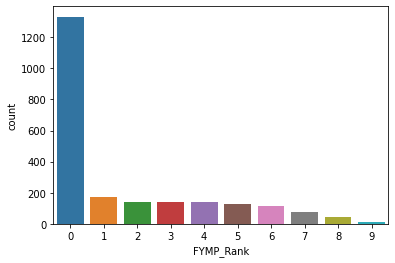

In [3]:
sns.countplot(data=stats, x="FYMP_Rank")

In [4]:
# Separates x and y values
X = stats.iloc[:,1:-4]
y = stats.iloc[:,[-1]]

X = X.values
y = y.values

In [5]:
# Creates training and testing data partition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

# X_train, X_test = X_train.reshape([-1, num_features]), X_test.reshape([-1, num_features])

## Model Building

In [6]:
num_classes = 20

model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 162,250
Trainable params: 162,250
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compiles model using following optimizer/loss function, with accuracy printed during training
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [8]:
# Categorically encodes the labels (y-values)
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Trains the data
model.fit(X_train, y_train, epochs=10, batch_size=50)

# Epoch 10: loss: 1.7946 - categorical_accuracy: 0.5163

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
37/37 [==============================] - 1s 4ms/step - loss: 1.7185 - categorical_accuracy: 0.5457
Epoch 2/10
37/37 [==============================] - 0s 4ms/step - loss: 1.3782 - categorical_accuracy: 0.5614
Epoch 3/10
37/37 [==============================] - 0s 4ms/step - loss: 1.3315 - categorical_accuracy: 0.5772
Epoch 4/10
37/37 [==============================

In [10]:
# Tests the model on the testing data
model.evaluate(X_test, y_test)

# loss: 1.8382 - categorical_accuracy: 0.5054

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
15/15 [==============================] - 0s 2ms/step - loss: 1.3452 - categorical_accuracy: 0.5662


[1.3452383279800415, 0.5661605000495911]